In [1]:
from quantipy.assets import Currency, Equity
from quantipy.trading import Position

# Creating a currency object
usd = Currency('USD')
print('Currency: ', usd.currency)
print('Is cash?: ', usd.is_cash)

print('\n')

# Creating an Equity object
aapl = Equity(name='Apple', symbol='AAPL')
print('Stock name: ', aapl.name)
print('Symbol: ', aapl.symbol)
print('Is cash?: ', aapl.is_cash)

# Creating positions
eur = Currency('EUR')
cash_position = Position(eur, 10_000)
boeing = Equity('Boeing', 'BA')
boeing_position = Position(boeing, 10_000)

Currency:  USD
Is cash?:  True


Stock name:  Apple
Symbol:  AAPL
Is cash?:  False


In [2]:
from quantipy.trading import Order, Trade, Broker
import yfinance as yf

ba = yf.ticker.Ticker('BA')
data1 = ba.history(start='2024-01-01', end='2024-03-01')
aapl = yf.ticker.Ticker('AAPL')
data2 = aapl.history()
data = {'BA':data1, 'AAPL':data2}

In [3]:
# Creating our broker with 10k euros initial capital
my_broker = Broker(data=data, initial_capital=10_000, currency=eur)

# Creating a new order for half of our equity on Boeing
my_broker._new_order(boeing, 0.5)
print('Outstanding orders: ', my_broker.orders)
my_broker._process_orders()

Outstanding orders:  [<quantipy.trading.Order object at 0x7f71e427ba10>]


In [4]:
print('Outstanding orders: ', my_broker.orders)
print('Open trades: ', my_broker.trades)
print('Open positions: ', my_broker.positions)

Outstanding orders:  []
Open trades:  [<quantipy.trading.Trade object at 0x7f71952d3790>]
Open positions:  []


In [5]:
current_trade = my_broker.trades[0]

my_broker._new_order(boeing, -15, parent_trade=current_trade)
my_broker.orders

my_broker._process_orders()


 closed a trade


In [6]:
current_trade.size

9.0

In [7]:
my_broker.orders
my_broker._new_order(boeing, -14, parent_trade=current_trade)


In [8]:
my_broker._process_orders()

my_broker.trades
my_broker.closed_trades


 closed a trade


In [9]:
from quantipy.trading import Strategy
from quantipy.backtest import Backtester

class TestStrategy(Strategy):
    def __init__(self, broker, asset, tp=210, sl=200, stop=205):
        super().__init__(broker)
        self.__asset = asset
        self.__tp = tp
        self.__sl = sl
        self.__stop = stop
    
    @property
    def asset(self):
        return self.__asset 
    
    def next(self):
        if self._Strategy__broker.trades == [] and self._Strategy__broker.last_price(self.__asset) < 205:
            self.buy(self.__asset,
                     stop_loss=self.__sl,
                     take_profit=self.__tp)
            print('order set')

my_broker = Broker(data=data, initial_capital=10_000, currency=eur)
strategy = TestStrategy(my_broker, boeing)

backtester = Backtester(data)
eq = backtester.run(strategy)

eq

251.75999450683594
[]
243.91000366210938
[]
244.94000244140625
[]
249.0
[]
229.0
[]
225.75999450683594
[]
227.83999633789062
[]
222.66000366210938
[]
217.6999969482422
[]
200.52000427246094
[]
order set
203.05999755859375

 closed a trade
211.61000061035156
[]
215.02000427246094
[]
214.92999267578125
[]
211.5
[]
214.1300048828125
[]
201.8800048828125
[]
order set
205.47000122070312
205.19000244140625

 closed a trade
200.44000244140625
[]
order set

 closed a trade
211.0399932861328
[]
209.80999755859375
[]
209.3800048828125
[]
206.6300048828125
[]
208.5800018310547
[]
211.9199981689453
[]
209.22000122070312
[]
209.1999969482422
[]
209.3300018310547
[]
204.4600067138672
[]
order set
203.3800048828125
205.3300018310547
203.88999938964844
203.3699951171875
201.57000732421875
201.5

 closed a trade
200.8300018310547
[]
order set
200.5399932861328
201.39999389648438
207.0

 closed a trade


array([10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        , 10000.        , 10000.        ,
       10000.        , 10000.        ,  9972.06964111, 10312.12976074,
       10312.12976074, 10312.12976074, 10312.12976074, 10312.12976074,
       10312.12976074, 10381.62973022, 10367.62979126, 10108.12966919,
       10308.04975891, 10308.04975891, 10308.04975891, 10308.04975891,
       10308.04975891, 10308.04975891, 10308.04975891, 10308.04975891,
       10308.04975891, 10308.04975891, 10133.12014771, 10228.66999817,
       10158.10987854, 10132.62966919, 10044.43026733, 10040.99990845,
        9967.49990845,  9895.46984863,  9937.60987854, 10212.01017761])

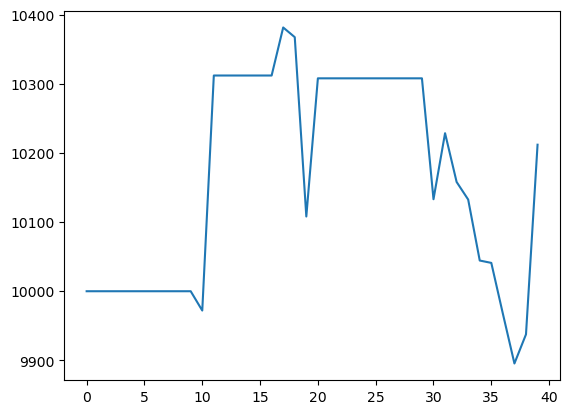

In [10]:
import matplotlib.pyplot as plt
plt.plot(eq)

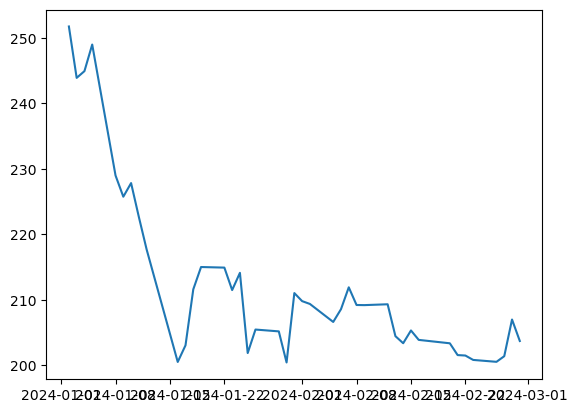

In [11]:
plt.plot(data['BA'].Close)

In [13]:
my_broker.closed_trades